# SVD with TF

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import scipy.spatial as sp
import tensorflow as tf

import matrices.loading as mload

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
plt.rcParams["figure.figsize"] = (16,16)
mpl.rcParams['image.cmap'] = 'jet'
mpl.rcParams['figure.dpi']= 150

In [3]:
data_path = "resources/aminer/v1" # 629814 documents
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True)) # tensorflow

In [4]:
# Load sparse matrix with jaccard similarities.
matrix_tmp = mload.load_matrix_jaccard_sim(data_path)

n = matrix_tmp.shape[0]

matrix_jaccard = tf.constant(matrix_tmp, name='matrix_jaccard')

# dice
matrix_dice = tf.constant(np.divide(np.multiply(2,matrix_tmp), np.add(matrix_tmp, 1)), name='matrix_dice')

# Jaccard disimilarity
matrix_jaccard_dis =  tf.constant(np.subtract(1, matrix_tmp), name='matrix_jaccard_dis')

del matrix_tmp

# Load sparse matrix with word2vec similarities.
matrix_tmp = mload.load_matrix_word2vec_sim(data_path)

matrix_word2vec = tf.constant(matrix_tmp, name='matrix_word2vec')

del matrix_tmp

print(matrix_jaccard)
print(matrix_jaccard_dis)
print(matrix_dice)
print(matrix_word2vec)

Loading saved matrix ...
Loading saved matrix ...
Tensor("matrix_jaccard:0", shape=(998, 998), dtype=float32)
Tensor("matrix_jaccard_dis:0", shape=(998, 998), dtype=float32)
Tensor("matrix_dice:0", shape=(998, 998), dtype=float32)
Tensor("matrix_word2vec:0", shape=(998, 998), dtype=float32)


In [5]:
# Means of jaccard similarities
jaccard_similarity_mean = tf.reduce_mean(matrix_jaccard, 1)

# Jaccard disimilarity
jaccard_disimilarity_mean = tf.reduce_mean(matrix_jaccard_dis, 1)

# Means of word2vec similarities
word2vec_similarity_mean = tf.reduce_mean(matrix_word2vec, 1)

# Means of dice similarities
dice_similarity_mean = tf.reduce_mean(matrix_dice, 1)

sess.run([jaccard_similarity_mean, word2vec_similarity_mean, dice_similarity_mean])

print(jaccard_similarity_mean)
print(jaccard_disimilarity_mean)
print(word2vec_similarity_mean)
print(dice_similarity_mean)

Tensor("Mean:0", shape=(998,), dtype=float32)
Tensor("Mean_1:0", shape=(998,), dtype=float32)
Tensor("Mean_2:0", shape=(998,), dtype=float32)
Tensor("Mean_3:0", shape=(998,), dtype=float32)


In [6]:
M = tf.Variable(tf.zeros((n,n),  dtype=tf.float32), dtype=tf.float32, name='M')
s, u, v = tf.svd(M)
ns = n
M_ = tf.matmul(u[:,:ns], tf.matmul(tf.diag( tf.ones(ns)  ), v[:,:ns], adjoint_b=True))
sess.run(tf.global_variables_initializer())


op = M.assign(matrix_jaccard)
sess.run(op)
jaccard_approximation = sess.run(M_)
jaccard_singular_values = sess.run(s)

op = M.assign(matrix_jaccard_dis)
sess.run(op)
jaccarddis_approximation = sess.run(M_)
jaccarddis_singular_values = sess.run(s)

op = M.assign(matrix_dice)
sess.run(op)
dice_approximation = sess.run(M_)
dice_singular_values = sess.run(s)

op = M.assign(matrix_word2vec)
sess.run(op)
word2vec_approximation = sess.run(M_)
word2vec_singular_values = sess.run(s)

print("svd")

svd


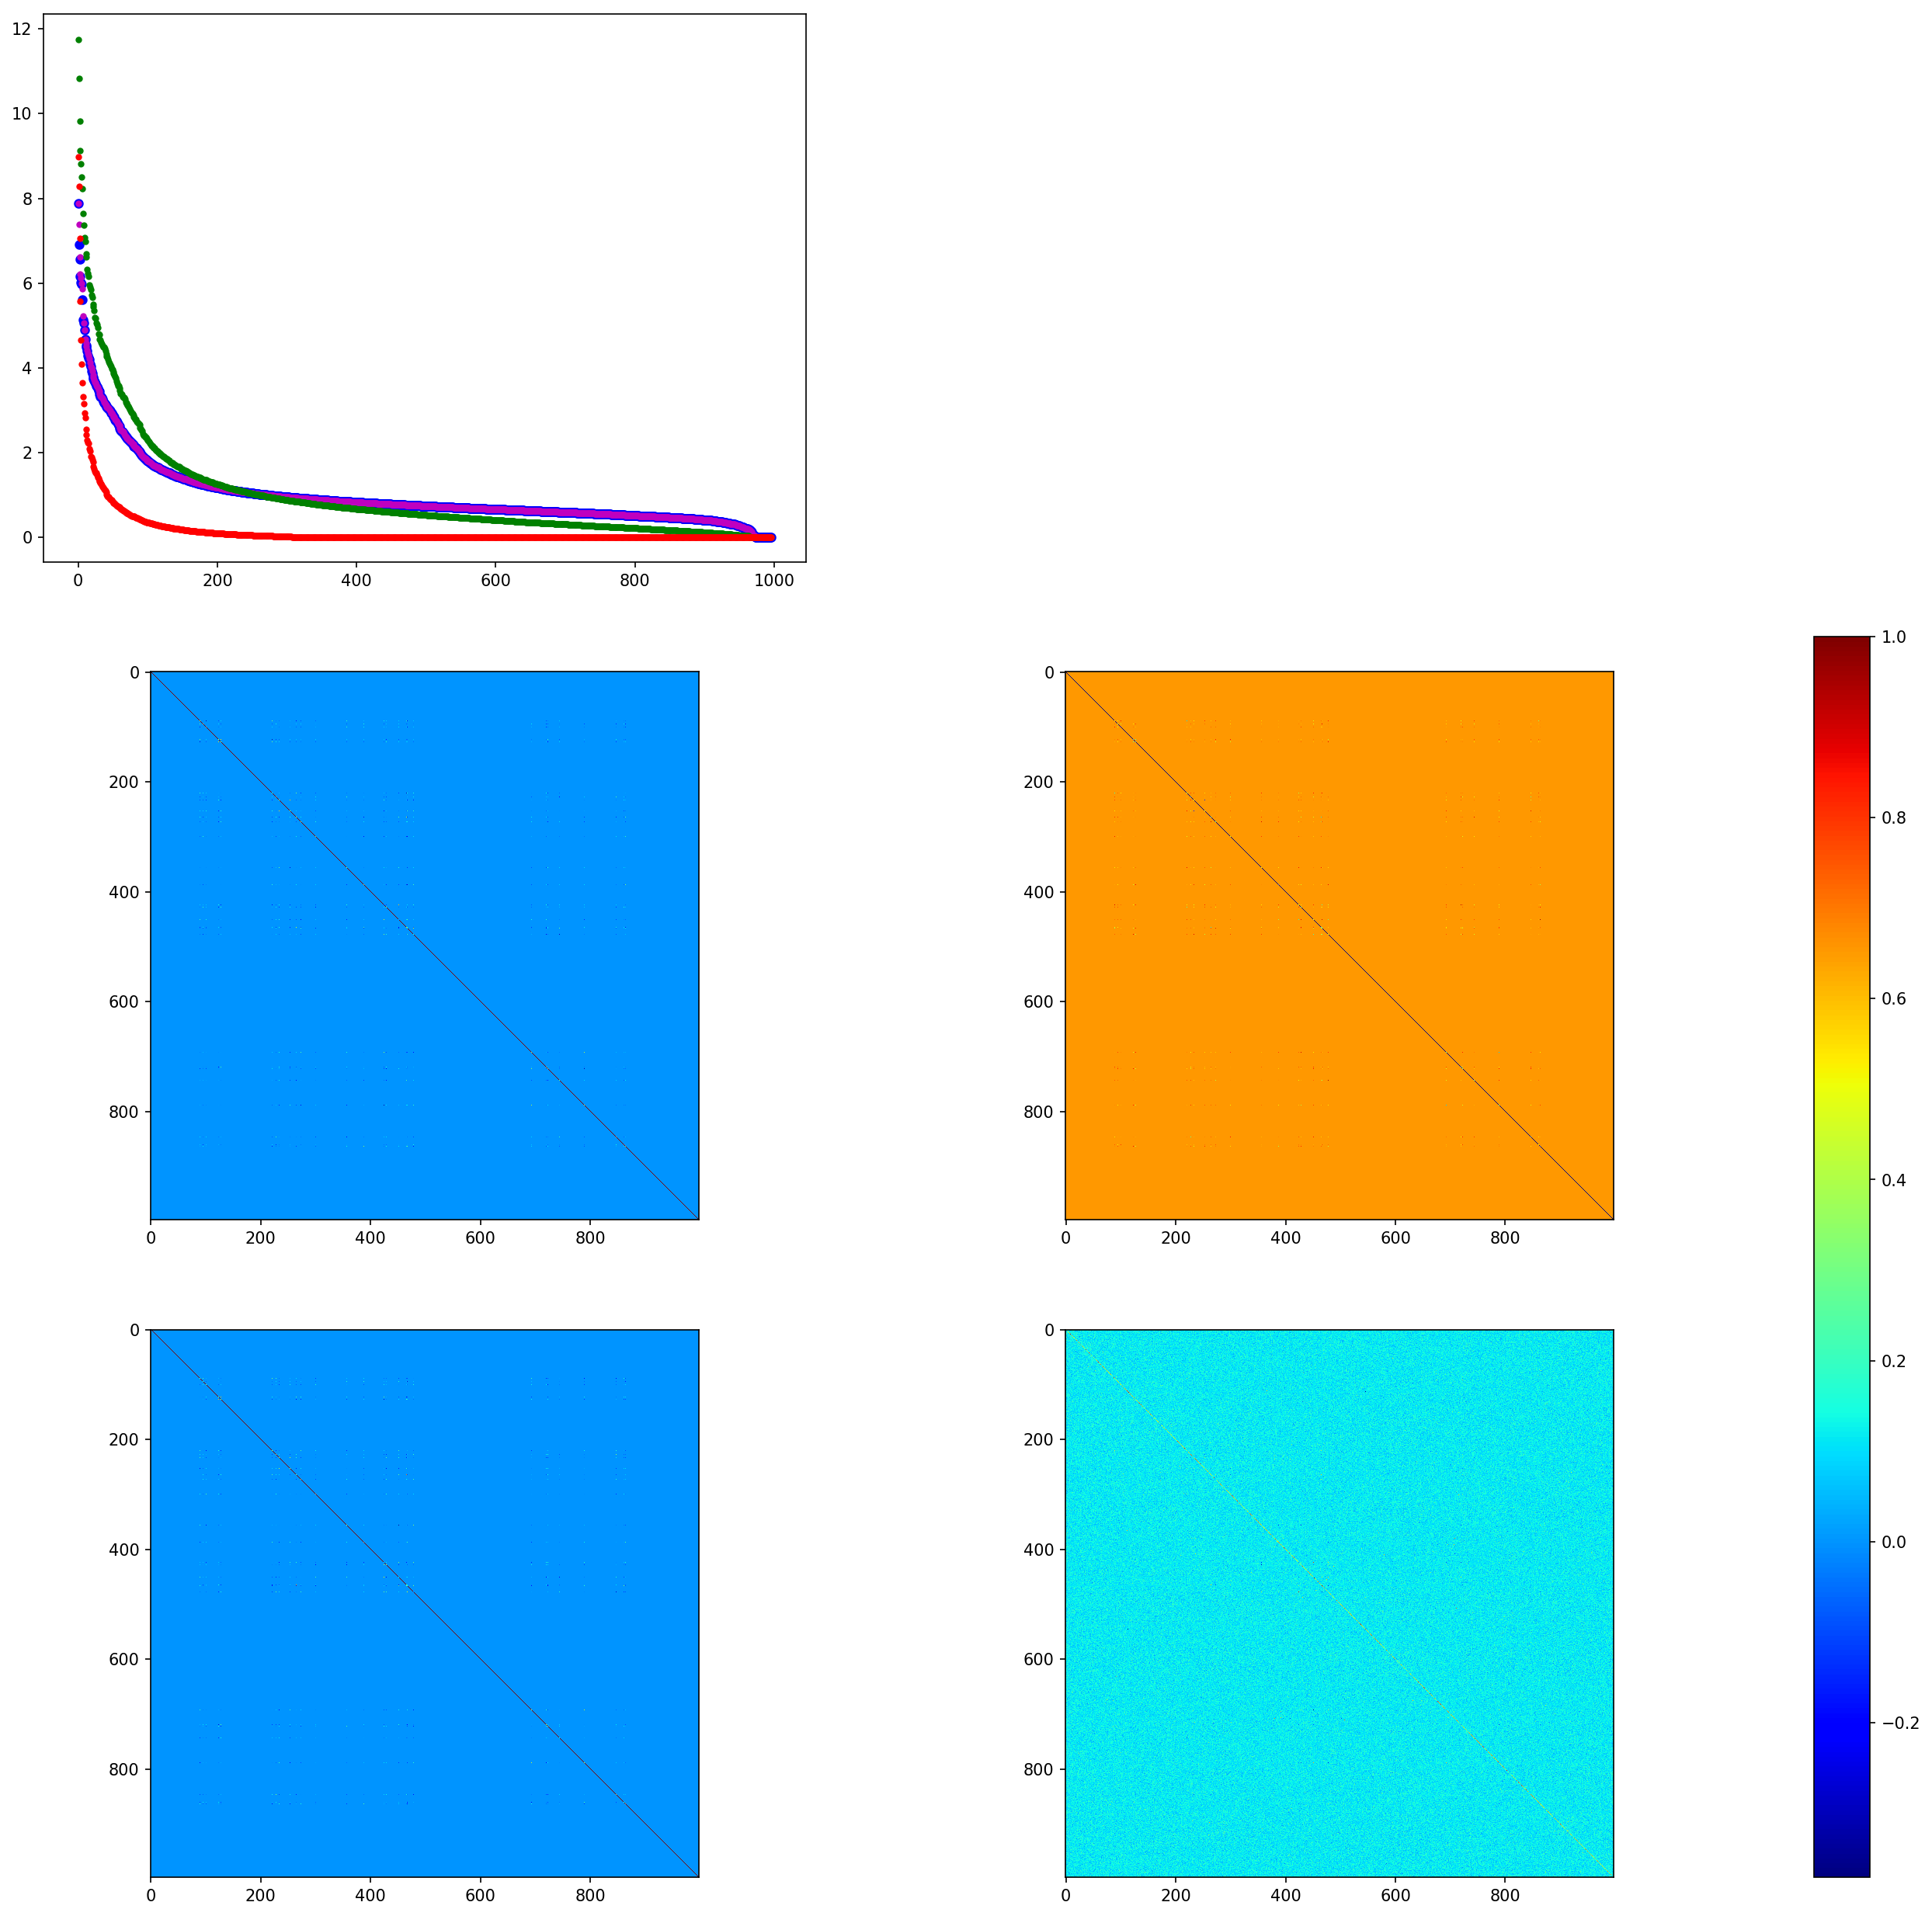

In [7]:
fig = plt.figure()

ax1 = plt.subplot(3, 2, 1)
ax1.plot(jaccard_singular_values[1:], 'b.', mew=3.0)
ax1.plot(jaccarddis_singular_values[1:], 'm.', mew=1.0)
ax1.plot(dice_singular_values[1:], 'g.', mew=1.0)
ax1.plot(word2vec_singular_values[1:], 'r.', mew=1.0)

ax_jaccard = plt.subplot(3, 2, 3)
ax_jaccard_dis = plt.subplot(3, 2, 4)
ax_dice = plt.subplot(3, 2, 5)
ax_word2vec = plt.subplot(3, 2, 6)

im = ax_jaccard.imshow(jaccard_approximation)
ax_jaccard_dis.imshow(jaccarddis_approximation)
ax_dice.imshow(dice_approximation)
ax_word2vec.imshow(word2vec_approximation)


plt.subplots_adjust(left=0.,  right=0.90, bottom=0.0, top=1.0)
cax = plt.axes([0.95, 0.0, 0.03, 0.666]) #[left, bottom, width, height] 
fig.colorbar(im, cax=cax)

plt.show()

In [9]:
sess.close()